In [11]:
import sys
sys.path.append(r'C:\Users\ricca\Desktop\MAGISTRALE\QTLab2324\DATA ANALYSIS')

In [12]:
from UTILS import drive

In [13]:
folder_id = '19ApmRMhBMmQ7gT2i8akhViuKDyhP3QML'

In [14]:
svc = drive.authenticate()

In [37]:
files = drive.list_files_in_folder(svc, folder_id, max_files=1000)

In [38]:
import matplotlib.pyplot as plt
import numpy as np

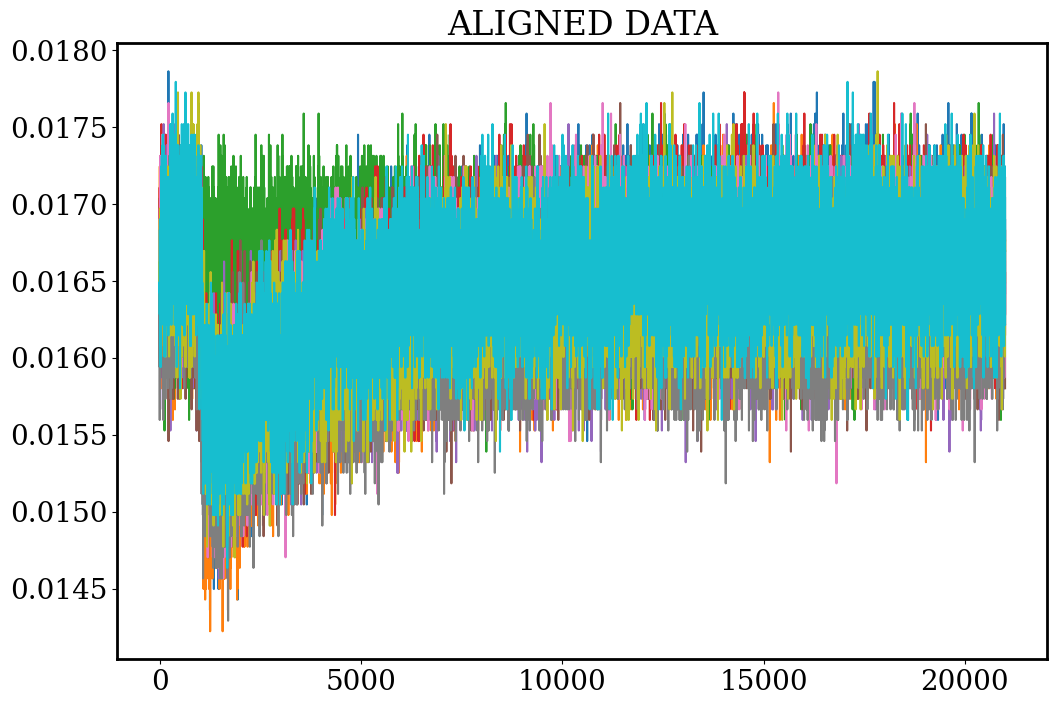

In [40]:
data = []
for i,file in enumerate(files):
    compressed_file_io = drive.download_file_from_drive(svc, file['id'])
    temp = drive.decompress_hdf5_to_memory(compressed_file_io)
    data.append(temp)
    T = np.linspace(0,len(temp),len(temp))
    plt.plot(T,temp)
    plt.title('ALIGNED DATA')

Import Noise Files

In [32]:
from UTILS.load_data import *
noise_file, svc = get_data('1jlqfOxQdq06XjZmWYrYFiQhtDJbilT8f',100)

In [33]:
noise = []
for nf in noise_file:
    noise.append(in_memory(nf, svc))

Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.
Download 100%.


In [34]:
from UTILS.OF import OF

In [35]:
# Instantiate the Medium class
medium_processor = OF.Medium()

In [41]:
data = -1 * np.array(data)
noise = -1 * np.array(noise)

In [42]:
preStop = 950  #E' il numero di punti della finestra di acquisizione senza il segnale.

bsl = np.mean(data[:,0:preStop],axis=1)
bsl_noise = np.mean(noise,axis=1)

#Faccio in modo tale che i dati e il rumore partano da 0

data = data - np.array([bsl]).T  
noise = noise - np.array([bsl_noise]).T

In [44]:
# Calcolo la PSD del rumore, il primo ingrediente del filtro ottimo
t_samp = 1/1e8   #in secondi

freq, PSD_noise, _ = OF.PSD(noise[:,:data.shape[1]],t_samp)
#freq, PSD_sig, _ = PSD(np.array([data[1]]),t_samp)

npt = PSD_noise.shape[0]
plt.loglog(-1*freq[npt//2:][::-1],PSD_noise[npt//2:][::-1],c='k')
plt.xlabel("Freq [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

AttributeError: module 'UTILS.OF.OF' has no attribute 'PSD'

In [28]:
medium_processor.NPS = np.array(np.abs(min(temp)/rms[i]))

In [29]:
freq, PSD_noise = medium_processor.PSD(noise,len(noise))

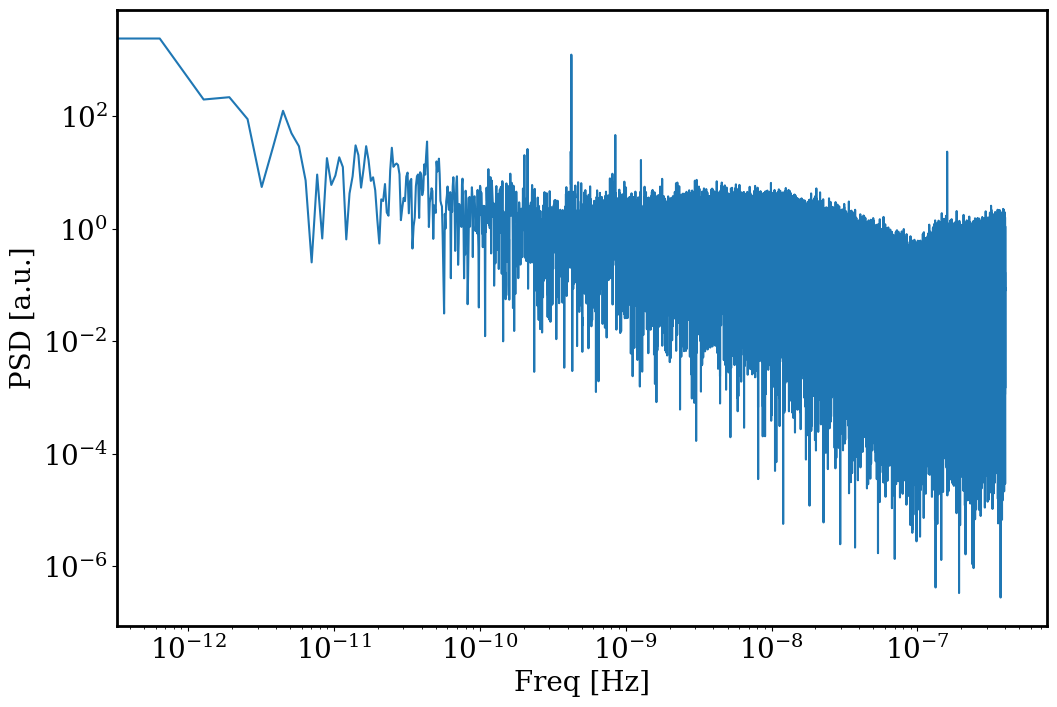

In [30]:
npt = len(PSD_noise)
plt.loglog(freq, PSD_noise)
plt.xlabel("Freq [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

In [17]:
medium_processor.NPS = PSD_noise[:len(temp)]
medium_processor.medium = medium_processor.create_medium(temp,np.zeros(temp.shape[0]))

Text(0, 0.5, 'Medium Signal [V]')

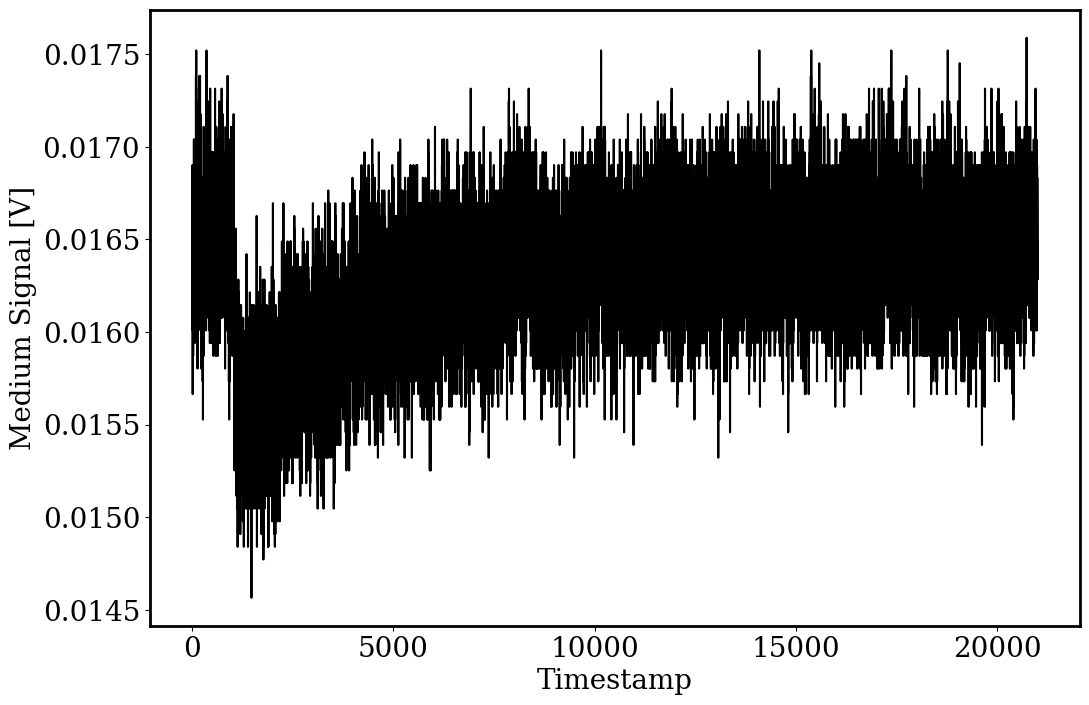

In [18]:
plt.plot(np.linspace(0,len(medium_processor.medium),len(medium_processor.medium)),medium_processor.medium,c='k')
plt.xlabel("Timestamp")
plt.ylabel('Medium Signal [V]')

In [19]:
# Creo il filtro H e lo applico ai dati su cui ho calcolato il medio
H = medium_processor.create_filter()

data_filtered_f = np.fft.fft(temp) * H  
data_filtered_t = np.fft.ifft(data_filtered_f).real
npt = len(data_filtered_t)
data_filtered_t = np.concatenate((data_filtered_t[npt//2:], data_filtered_t[:npt//2]))

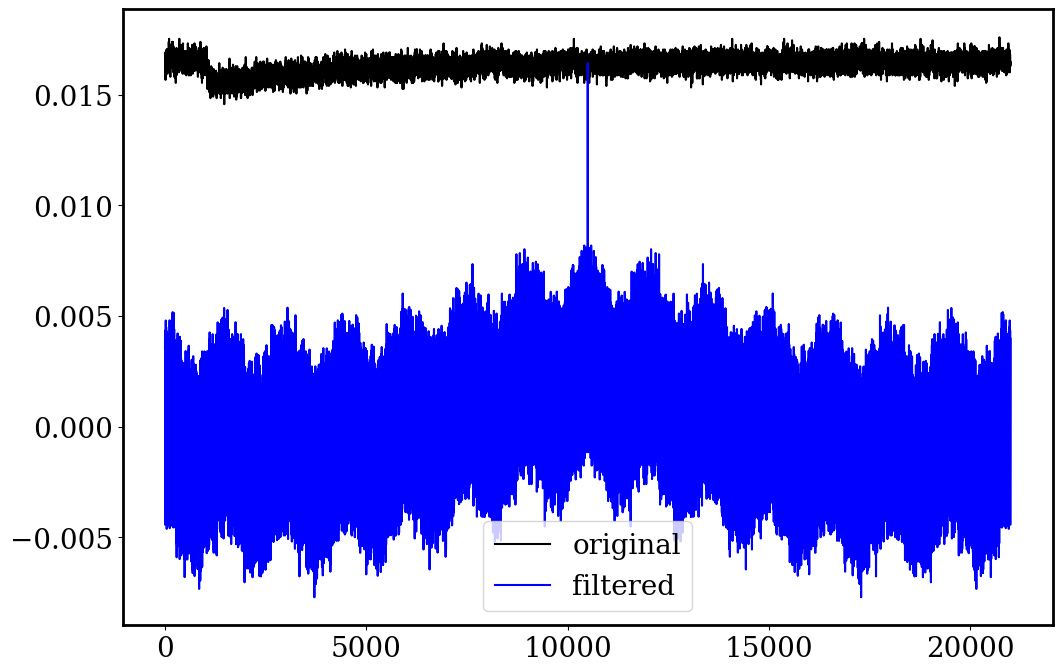

In [20]:
plt.plot(temp,c='k',label="original")
plt.plot(data_filtered_t,label="filtered",c='b')
plt.legend()
plt.show()

In [21]:
OFT, OFF, OFdelay, OFtest, _ = medium_processor.applyOF(temp,H)